In [111]:
import json
import csv

In [112]:
import pandas as pd

In [136]:
write_to = open('pricing_data_restructured_for_visualizations.json', 'w')

with open('pricing_table.json', 'r') as jsonfile:
    all_info = []
    pricing_json = json.load(jsonfile)
    for batch in pricing_json:
        models = list(pricing_json[batch].keys())
        for model in models[:4]:
            info = {}
            info["model_key"] = model
            info["output_token_price"] = pricing_json[batch][model]["output_token_price"]
            info["organization"] = batch
            all_info.append(info)

json.dump(all_info, write_to, indent = 2)
    

In [137]:
with open('pricing_data_restructured_for_visualizations.json', 'r') as file:
    pricing_data = pd.read_json(file)

In [138]:
with open('rankings.json', 'r') as jsonfile:
    rankings_json = pd.read_json(jsonfile)

In [139]:
def update_data_with_rank(row):
  model_key = row['model_key']
  if model_key in rankings_json:
    return rankings_json[model_key]["elo_rating"]
  return None

In [140]:
pricing_data['score'] = pricing_data.apply(update_data_with_rank, axis=1)
pricing_data.dropna(subset=['output_token_price'], inplace=True)
pricing_data.dropna(subset=['score'], inplace=True)

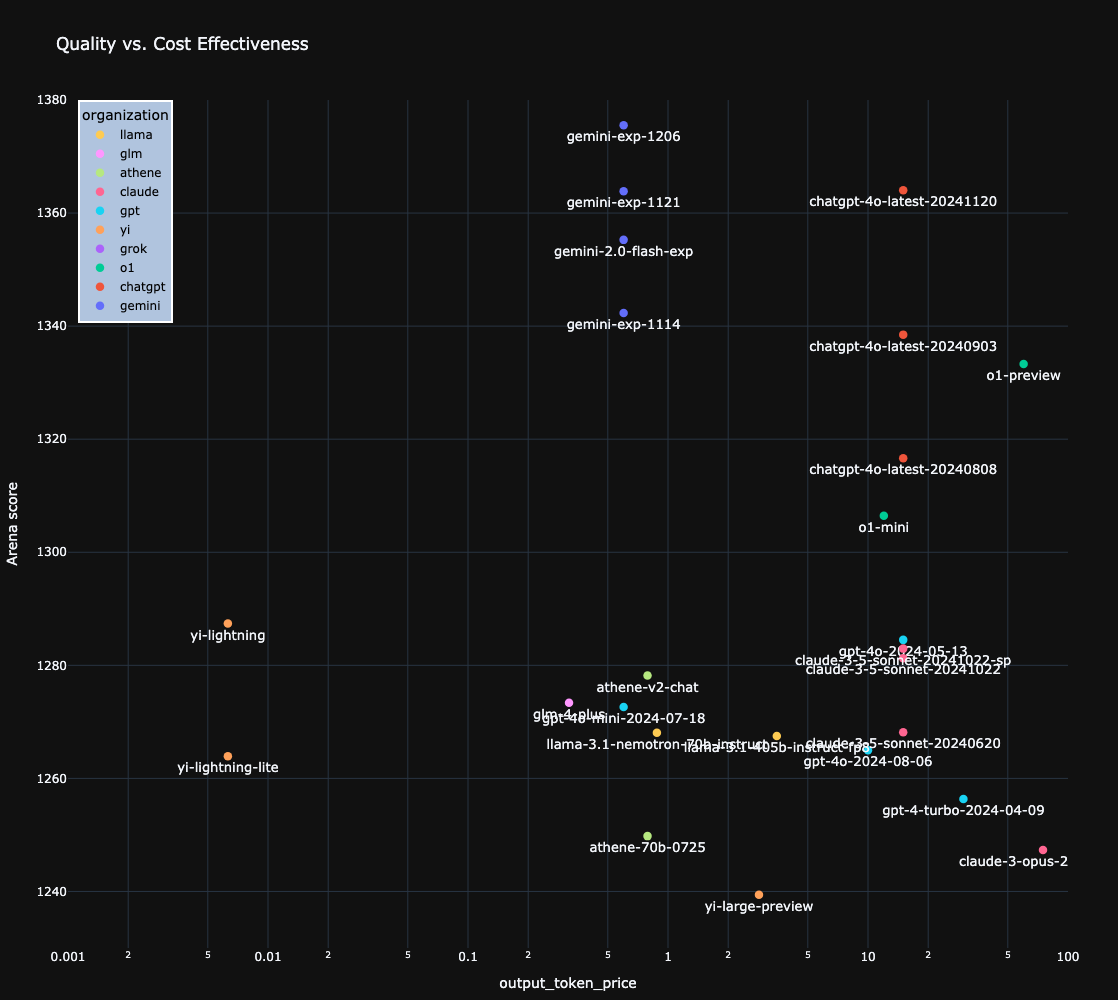

In [146]:
import plotly.express as px
import plotly.graph_objects as go

fig = px.scatter(pricing_data[:30], y="score", x="output_token_price", title="Quality vs. Cost Effectiveness", labels={
                     "output_tokens_per_USD": "# of output tokens per USD (in thousands)",
                     "score": "Arena score"}, color="organization", log_x=True, text="model_key")
fig.update_traces(
    textposition="bottom center",  # Change position if needed (e.g., 'top center', 'bottom right')
    textfont=dict(size=13.2),    # Adjust font size for better readability
    texttemplate='%{text}',   # Control text formatting
)
fig.update_traces(marker=dict(size=8.5))

fig.update_xaxes(range=[-3,
                        2])

fig.update_yaxes(range=[1230,
                        1380])

fig.update_layout(
    height=2000,  # Set the height to a larger value
    margin=dict(
        l=50,  # Left margin
        r=50,  # Right margin
        t=100,  # Top margin
        b=50   # Bottom margin
    )
)
fig.update_layout(template="plotly_dark")
fig.update_layout(
    legend=dict(
        x=0.01,
        y=1,
        traceorder="reversed",
        font=dict(
            size=12,
            color="black"
        ),
        bgcolor="LightSteelBlue",
        bordercolor="White",
        borderwidth=2
    )
)
# fig.update_traces(showlegend=False)
fig.show()

In [104]:
fig.write_html("figure2.html")

In [ ]:
import plotly.graph_objects as go


def visualize_price_control(models, before, after, lower_bound, upper_bound, category, style,
                            reverse=False, criteria="Arena Score"):
    # Create traces for each model
    fig = go.Figure()

    for i, model in enumerate(models):
        fig.add_trace(go.Scatter(
            x=[category, category + " + Price " + style + "Control"],
            y=[before[i], after[i]],
            mode='lines+markers',
            name=model,
            line=dict(width=4),
            marker=dict(size=14)
        ))
        # Update layout for aesthetics
    bounds = [lower_bound, upper_bound]
    if reverse:
        bounds = [upper_bound, lower_bound]
    fig.update_layout(
        title=dict(
            text=category + " Ranking + " + "Price " + style + "Control",
            subtitle=dict(
                text="Chatbot Arena: " + category + " (left), " + category + " + Price " + style + "Control (right)",
                font=dict(color="gray", size=14),
            ),
        ),
        xaxis_title="Category",
        yaxis_title=f"Performance ({criteria})",
        xaxis=dict(tickmode='array', tickvals=[category, category + " + Price " + style + "Control"]),
        yaxis=dict(range=bounds),

        plot_bgcolor='black',
        paper_bgcolor='black',
        title_font=dict(size=25, color='white'),
        font=dict(color='white'),
        legend=dict(font=dict(size=14)),
        width=600,  # Adjust width here to make it narrower
        height=700  # You can adjust the height as well if needed
    )


    # Show the figure
    fig.show()

In [ ]:
# Overall ranking change controlled for price
models = ['chatgpt-4o-latest', 'gemini-1.5-pro-exp-0827', 'claude-3-5-sonnet-20240620', 'gemini-1.5-flash-exp-0827', 'llama-3.1-405b-instruct', 'gpt-4o-2024-08-06', 'gpt-4-turbo-2024-04-09', 'athene-70b-0725']
overall_scores = [1316.71, 1300.29, 1270.79, 1269.42, 1266.35, 1261.41, 1257.34, 1249.15]
price_control_scores = [1305.61, 1298.1, 1264.05, 1270.23, 1265.78, 1255.79, 1240.69, 1249.72]

visualize_price_control(models, overall_scores, price_control_scores, 1235, 1320, "Overall", "")

In [ ]:
# Ranking change for hard prompts
models = ['chatgpt-4o-latest', 'gemini-1.5-pro-exp-0827', 'claude-3-5-sonnet-20240620', 'gemini-1.5-flash-exp-0827', 'llama-3.1-405b-instruct', 'gpt-4o-2024-08-06', 'gpt-4-turbo-2024-04-09', 'athene-70b-0725']
overall_scores = [1314.65, 1289.05, 1280.79, 1264.57, 1270.19, 1264.9, 1254.47, 1247.9]
price_control_scores = [1305.48, 1287.14, 1274.61, 1265.92, 1269.64, 1260.23, 1239.49, 1248.22]

visualize_price_control(models, overall_scores, price_control_scores, 1235, 1315, "Hard Prompt", "")